## Vendas

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#### Básico

Leia o arquivo produtos.csv

In [25]:
produtos = pd.read_csv('produtos.csv.txt')
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco
0,1,Notebook,Eletrônicos,10,2500.0
1,2,Café,Bebidas,200,16.5
2,3,Tênis,Esportes,50,159.0
3,4,Bermuda,Vestuário,18,59.9
4,5,Meia,Vestuário,250,14.9


In [26]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_prod       30 non-null     int64  
 1   nome_produto  30 non-null     object 
 2   categoria     30 non-null     object 
 3   estoque       30 non-null     int64  
 4   preco         30 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB


Liste todos os produtos da categoria "Vestuário".

In [27]:
produtos[produtos['categoria']=='Vestuário']

,id_prod,nome_produto,categoria,estoque,preco
3,4,Bermuda,Vestuário,18,59.9
4,5,Meia,Vestuário,250,14.9
7,8,Camiseta,Vestuário,30,49.9
11,12,Boné,Vestuário,25,39.9
12,13,Calça,Vestuário,20,89.9
13,14,Moletom,Vestuário,6,129.9
14,15,Jaqueta,Vestuário,14,199.0
19,20,Blusa,Vestuário,12,79.9
26,27,Regata,Vestuário,15,39.9
27,28,Sandália,Vestuário,11,65.0


Qual produto tem o menor estoque?

In [28]:
produtos.groupby('nome_produto')['estoque'].sum().reset_index().sort_values('estoque').head(1)


,nome_produto,estoque
16,Moletom,6


Quantos produtos diferentes existem em cada categoria?

In [29]:
produtos.groupby('categoria')['id_prod'].count()

categoria
Acessórios      3
Bebidas         5
Consumo         2
Eletrônicos     6
Esportes        4
Vestuário      10
Name: id_prod, dtype: int64

#### Intermediário

Calcule o valor total em estoque de cada produto (estoque x preco).

In [30]:
produtos['valor_estoque'] = produtos['preco'] * produtos['estoque']
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco,valor_estoque
0,1,Notebook,Eletrônicos,10,2500.0,25000.0
1,2,Café,Bebidas,200,16.5,3300.0
2,3,Tênis,Esportes,50,159.0,7950.0
3,4,Bermuda,Vestuário,18,59.9,1078.2
4,5,Meia,Vestuário,250,14.9,3725.0


Gere uma tabela com o valor total em estoque por categoria.

In [31]:
valor_categ = produtos.groupby('categoria')['valor_estoque'].sum().reset_index()
valor_categ

,categoria,valor_estoque
0,Acessórios,8333.0
1,Bebidas,8673.0
2,Consumo,3057.5
3,Eletrônicos,60271.6
4,Esportes,15609.0
5,Vestuário,14933.4


Mostre todos os produtos com estoque inferior a 15 unidades.

In [32]:
produtos[produtos['estoque']<15][['nome_produto','estoque']].sort_values('estoque')

,nome_produto,estoque
13,Moletom,6
28,Bolsa,7
6,Smartphone,8
18,Bola de futebol,9
0,Notebook,10
27,Sandália,11
19,Blusa,12
8,Mochila,12
14,Jaqueta,14


Crie um gráfico de barras mostrando o estoque por categoria.

In [33]:
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco,valor_estoque
0,1,Notebook,Eletrônicos,10,2500.0,25000.0
1,2,Café,Bebidas,200,16.5,3300.0
2,3,Tênis,Esportes,50,159.0,7950.0
3,4,Bermuda,Vestuário,18,59.9,1078.2
4,5,Meia,Vestuário,250,14.9,3725.0


In [34]:
estoque_cat = produtos.groupby('categoria')['estoque'].sum().reset_index().sort_values('estoque').reset_index(drop=True)
estoque_cat

,categoria,estoque
0,Acessórios,45
1,Eletrônicos,89
2,Esportes,93
3,Consumo,115
4,Vestuário,401
5,Bebidas,890


<BarContainer object of 6 artists>

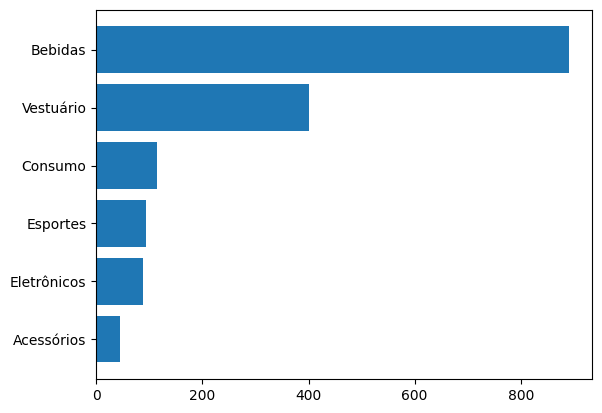

In [35]:
plt.barh(estoque_cat['categoria'],estoque_cat['estoque'])

#### Avançado

Identifique quais produtos nunca foram vendidos, cruzando com o arquivo de vendas.

In [36]:
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco,valor_estoque
0,1,Notebook,Eletrônicos,10,2500.0,25000.0
1,2,Café,Bebidas,200,16.5,3300.0
2,3,Tênis,Esportes,50,159.0,7950.0
3,4,Bermuda,Vestuário,18,59.9,1078.2
4,5,Meia,Vestuário,250,14.9,3725.0


In [37]:
vendas = pd.read_csv('vendas.csv.txt')
vendas.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor
0,1,2025-07-01,Camiseta,un,49.9,2,Joana
1,2,2025-07-01,Calça,un,89.9,1,Ricardo
2,3,2025-07-02,Tênis,par,159.0,1,Ana
3,4,2025-07-02,Bermuda,un,59.9,3,Joana
4,5,2025-07-03,Meia,par,14.9,5,Ricardo


In [38]:
vendas = vendas.groupby('produto')['quantidade'].sum().reset_index()
vendas = vendas.rename(columns={'quantidade':'vendido'})
vendas


,produto,vendido
0,Bermuda,8
1,Boné,6
2,Calça,5
3,Camiseta,9
4,Jaqueta,3
5,Meia,14
6,Moletom,4
7,Tênis,3


In [39]:
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco,valor_estoque
0,1,Notebook,Eletrônicos,10,2500.0,25000.0
1,2,Café,Bebidas,200,16.5,3300.0
2,3,Tênis,Esportes,50,159.0,7950.0
3,4,Bermuda,Vestuário,18,59.9,1078.2
4,5,Meia,Vestuário,250,14.9,3725.0


In [40]:
produtos_ven = produtos.merge(vendas,
                              left_on = 'nome_produto',
                              right_on='produto',
                              how='left'
)
produtos_ven.drop('produto',axis=1,inplace=True)
produtos_ven['vendido'] = produtos_ven['vendido'].fillna(0).astype(int)
produtos_ven.head()


,id_prod,nome_produto,categoria,estoque,preco,valor_estoque,vendido
0,1,Notebook,Eletrônicos,10,2500.0,25000.0,0
1,2,Café,Bebidas,200,16.5,3300.0,0
2,3,Tênis,Esportes,50,159.0,7950.0,3
3,4,Bermuda,Vestuário,18,59.9,1078.2,8
4,5,Meia,Vestuário,250,14.9,3725.0,14


In [41]:
produtos_ven[produtos_ven['vendido']==0][['nome_produto','vendido']]

,nome_produto,vendido
0,Notebook,0
1,Café,0
5,Fone de ouvido,0
6,Smartphone,0
8,Mochila,0
9,Sapato,0
10,Mouse,0
15,Guaraná,0
16,Chá,0
17,Carregador,0


Descubra o ticket médio dos produtos de cada categoria vendidos (valor médio de venda, cruzando com vendas).

In [42]:
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco,valor_estoque
0,1,Notebook,Eletrônicos,10,2500.0,25000.0
1,2,Café,Bebidas,200,16.5,3300.0
2,3,Tênis,Esportes,50,159.0,7950.0
3,4,Bermuda,Vestuário,18,59.9,1078.2
4,5,Meia,Vestuário,250,14.9,3725.0


In [43]:
produtos.groupby('categoria')['valor_estoque'].mean().reset_index()

,categoria,valor_estoque
0,Acessórios,2777.666667
1,Bebidas,1734.600000
2,Consumo,1528.750000
3,Eletrônicos,10045.266667
4,Esportes,3902.250000
5,Vestuário,1493.340000


Simule uma tabela de reposição, sugerindo reabastecimento para todos os produtos com estoque abaixo de 10 unidades.

In [44]:
produtos[produtos['estoque']<=10]

,id_prod,nome_produto,categoria,estoque,preco,valor_estoque
0,1,Notebook,Eletrônicos,10,2500.0,25000.0
6,7,Smartphone,Eletrônicos,8,3200.0,25600.0
13,14,Moletom,Vestuário,6,129.9,779.4
18,19,Bola de futebol,Esportes,9,99.0,891.0
28,29,Bolsa,Acessórios,7,199.0,1393.0


Plote um heatmap mostrando o estoque versus preço para todos os produtos de "Eletrônicos".

In [45]:
eletronicos = produtos[produtos['categoria']=='Eletrônicos'][['nome_produto','estoque','preco']].sort_values('estoque').reset_index(drop=True)
eletronicos

,nome_produto,estoque,preco
0,Smartphone,8,3200.0
1,Notebook,10,2500.0
2,Mouse,15,89.9
3,Fone de ouvido,17,225.0
4,Carregador,19,99.9
5,Teclado,20,130.0


#achei que o heatmap n era a proposta ideal pra esse df


pensando em um gráfico de dispersão com etiquetas possa ser melhor para analisar

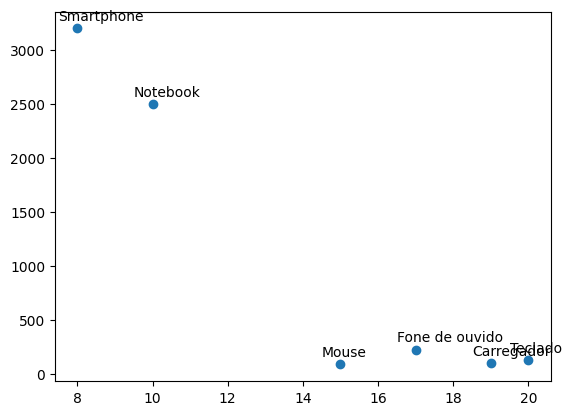

In [46]:
plt.scatter(
    eletronicos['estoque'],
    eletronicos['preco'],
)
for i,nome in enumerate(eletronicos['nome_produto']):
    plt.text(eletronicos['estoque'].iloc[i]-0.5, 
             eletronicos['preco'].iloc[i]+75, 
             nome
             )
plt.show()